# **cv2**

In [113]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_path = '/content/picture.jpg'
img = cv2.imread(img_path)
print(img.shape)

(1176, 720, 3)


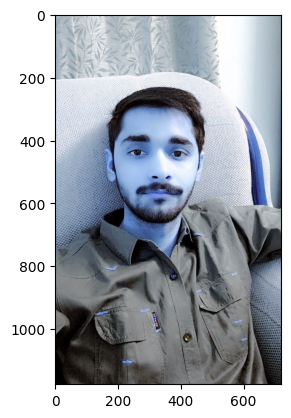

In [114]:
plt.imshow(img)

(1176, 720)


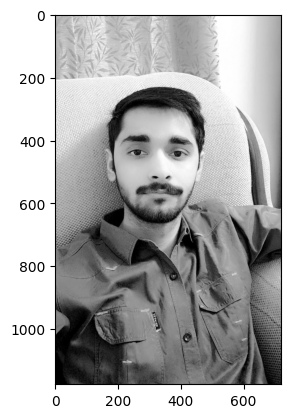

In [115]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')
print(gray_img.shape)

(np.float64(-0.5), np.float64(449.5), np.float64(699.5), np.float64(-0.5))

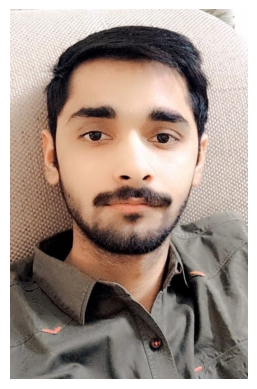

In [116]:
x=100
y=200
width=450
height=700
cropped_img = img[y:y+height,x:x+width]
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))
plt.axis('off')

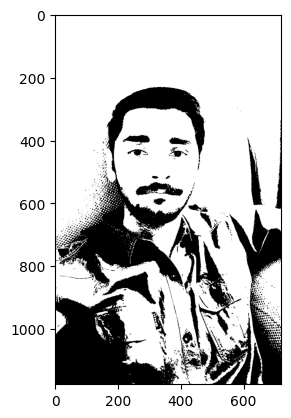

In [117]:
(thresh,blackNwhite_img) = cv2.threshold(gray_img,110,255,cv2.THRESH_BINARY)
plt.imshow(blackNwhite_img,cmap='gray')

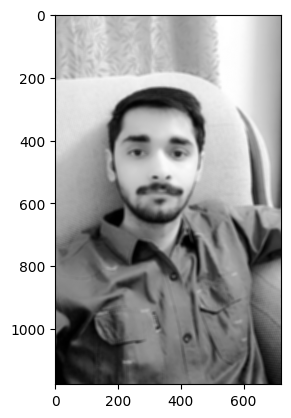

In [118]:
blurred_img = cv2.blur(gray_img,(10,10))
plt.imshow(blurred_img,cmap='gray')

(np.float64(-0.5), np.float64(719.5), np.float64(1175.5), np.float64(-0.5))

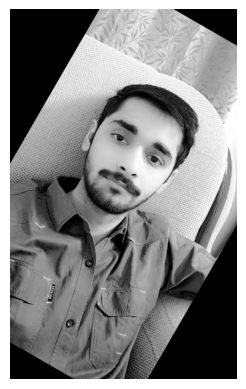

In [119]:
angle=-30
scale=1.0
[h,w]=img.shape[:2]
centre=[w//2,h//2]
M=cv2.getRotationMatrix2D(centre,angle,scale)
rotated_img=cv2.warpAffine(gray_img,M,(w,h))
plt.imshow(cv2.cvtColor(rotated_img,cv2.COLOR_BGR2RGB))
plt.axis('off')

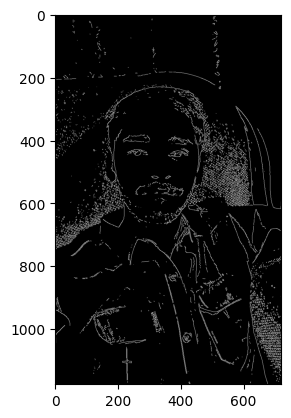

In [120]:
outlined_img=cv2.Canny(gray_img,200,255)
plt.imshow(outlined_img,cmap='gray')

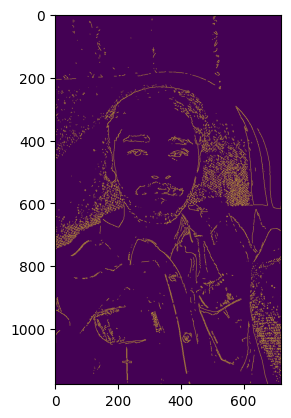

In [121]:
lines=cv2.HoughLinesP(outlined_img,1,np.pi/180,150)
for line in lines:
  x1,y1,x2,y2=line[0]
  cv2.line(outlined_img,(x1,y1),(x2,y2),(0,255,0),4)
plt.imshow(outlined_img)

# **scikit-image**

In [122]:
from skimage.io import imread
image=imread('/content/rose.jpeg')
type(image)

numpy.ndarray

In [123]:
import numpy as np
image_matrix=np.array(image)
print(image_matrix)

[[[ 0 10  9]
  [ 0 10  9]
  [ 0 10  9]
  ...
  [ 0 14 11]
  [ 0 14 11]
  [ 0 14 11]]

 [[ 0 10  9]
  [ 0 10  9]
  [ 0 10  9]
  ...
  [ 0 14 11]
  [ 0 14 11]
  [ 0 14 11]]

 [[ 0 10  9]
  [ 0 10  9]
  [ 0 10  9]
  ...
  [ 0 14 11]
  [ 0 14 11]
  [ 0 14 11]]

 ...

 [[ 0 18 18]
  [ 0 18 18]
  [ 0 18 18]
  ...
  [ 0  8  7]
  [ 0  9  8]
  [ 0  9  8]]

 [[ 0 18 18]
  [ 0 18 18]
  [ 0 18 18]
  ...
  [ 0  9  8]
  [ 0  9  8]
  [ 0  9  8]]

 [[ 0 18 18]
  [ 0 18 18]
  [ 0 18 18]
  ...
  [ 0  9  8]
  [ 0  9  8]
  [ 0 10  9]]]


In [124]:
image.shape

(275, 183, 3)

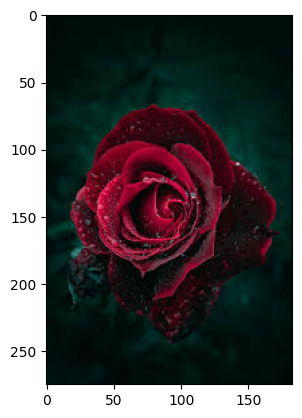

In [125]:
plt.imshow(image)

In [126]:
image.ndim

3

In [127]:
image.size

150975

Text(0.5, 1.0, 'red channel')

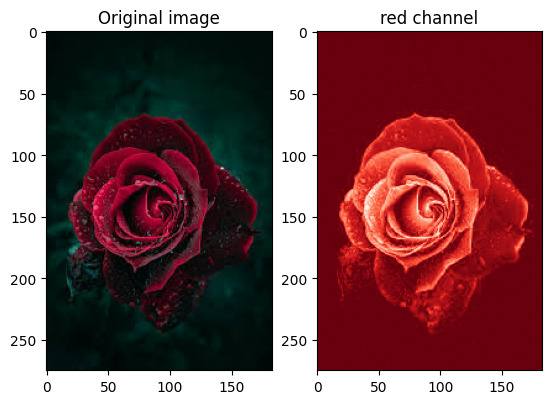

In [128]:
import matplotlib.pyplot as plt
red=image[:,:,0]         # 0:red
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(red,cmap='Reds_r')
plt.title('red channel')

Text(0.5, 1.0, 'green channel')

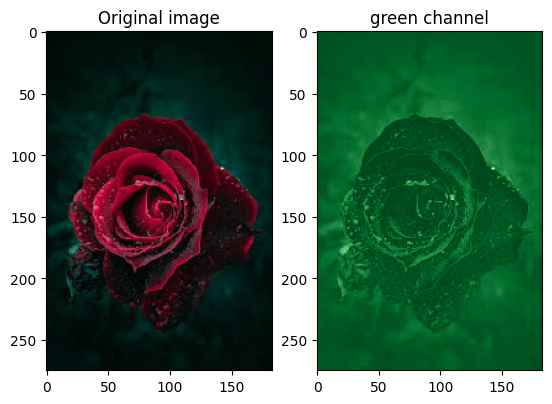

In [129]:
import matplotlib.pyplot as plt
green=image[:,:,1]    # 1:green
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(green,cmap='Greens_r')
plt.title('green channel')

Text(0.5, 1.0, 'blue channel')

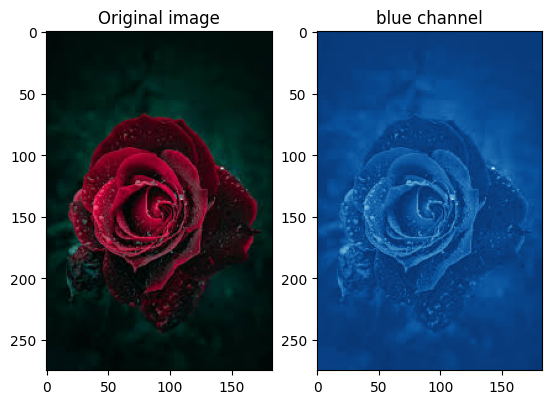

In [130]:
import matplotlib.pyplot as plt
blue=image[:,:,2]        # 2:blue
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(blue,cmap='Blues_r')
plt.title('blue channel')

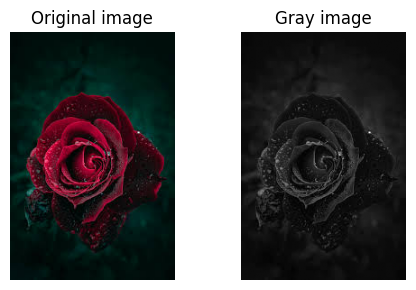

In [131]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread

def compare(img1,img2,title1,title2):
  plt.figure(figsize=(5,3))

  plt.subplot(1,2,1)
  plt.imshow(img1)
  plt.title(title1)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(img2,cmap='gray')
  plt.title(title2)
  plt.axis('off')

  plt.tight_layout()

imag=imread('/content/rose.jpeg')
gray=rgb2gray(imag)
compare(imag,gray,'Original image','Gray image')

In [132]:
gray.shape

(275, 183)

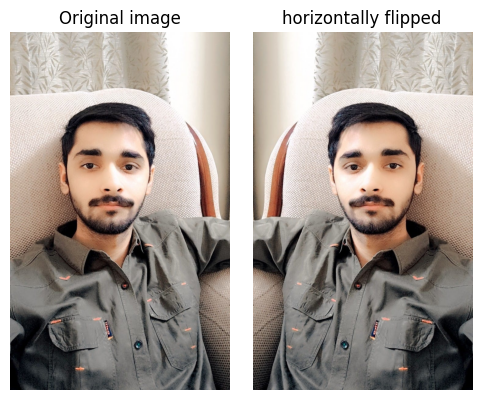

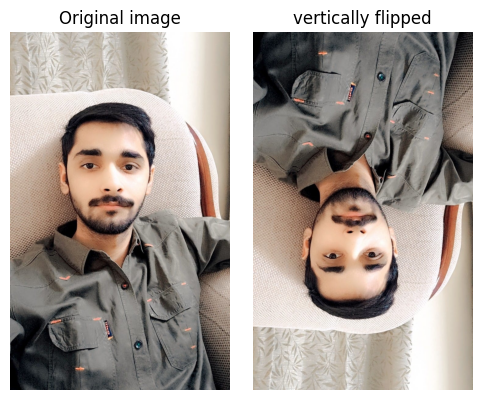

In [133]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread

def compare(img1,img2,title1,title2):
  plt.figure(figsize=(5,4))

  plt.subplot(1,2,1)
  plt.imshow(img1)
  plt.title(title1)
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(img2)
  plt.title(title2)
  plt.axis('off')

  plt.tight_layout()

picture=imread('/content/picture.jpg')
h_flipped = np.fliplr(picture)
v_flipped = np.flipud(picture)
compare(picture,h_flipped,'Original image','horizontally flipped')
compare(picture,v_flipped,'Original image','vertically flipped')

In [134]:
def plot_with_hist_channel(image,channel):
  channels=['red','green','blue']
  channel_idx=channels.index(channel)
  color=channels[channel_idx]
  extracted_channel=image[:,:,channel_idx]
  fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(9,5))
  ax1.imshow(image)
  ax1.axis('off')
  ax2.hist(extracted_channel.ravel(),bins=256,color=color)
  ax2.set_xlim([0,100])
  ax2.set_title(f"{channels[channel_idx]} histogram")
  plt.tight_layout()

In [135]:
colorful_scenery=imread("/content/rose.jpeg")

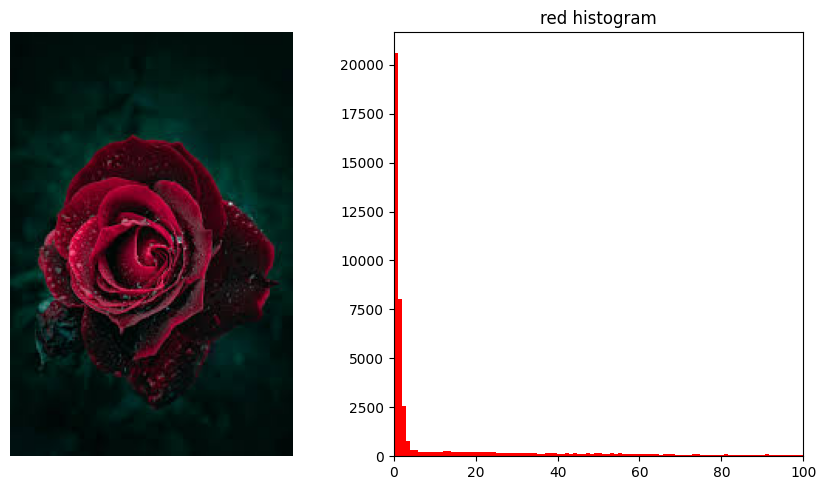

In [136]:
plot_with_hist_channel(colorful_scenery,"red")

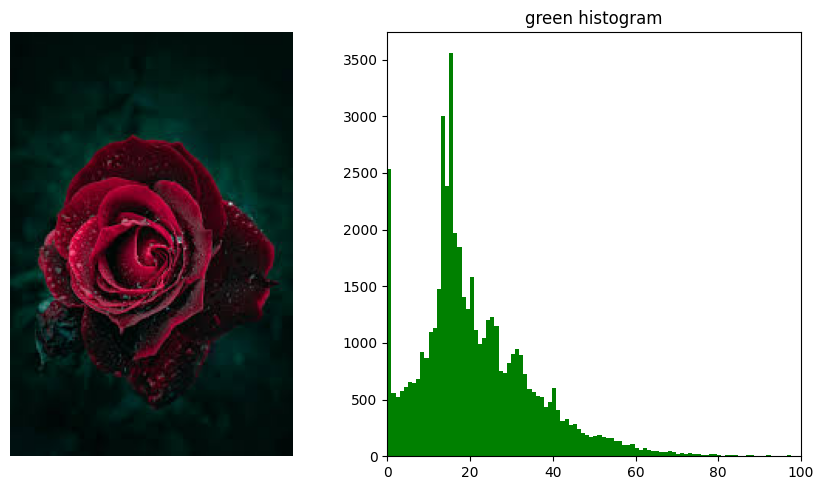

In [137]:
plot_with_hist_channel(colorful_scenery,"green")

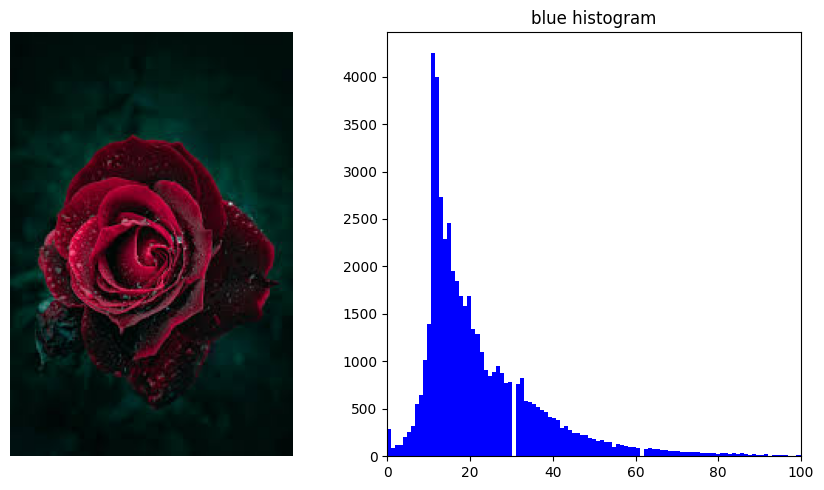

In [138]:
plot_with_hist_channel(colorful_scenery,"blue")

**Image Conversion** *(jpeg to png)*

In [139]:
input = '/content/rose.jpeg'
output = '/content/rose.png'
rose=cv2.imread(input)
cv2.imwrite('/content/rose.png',rose)
print("Converted Successfully!!")

Converted Successfully!!
